# Visualizing results masked inference


## remeber in the classification task we got the following results using BERT:

- Boolean Connective 100%
    
- Quantifiers 90.5%

- Counting 87.5%



### all imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inference.text_generation.util import num2word

In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

### reading csv

In [2]:
df_bc = pd.read_csv("results/BC_basic.csv")
# df_q = pd.read_csv()
df_count = pd.read_csv("results/count_basic.csv")

#### General functions

In [3]:
## creating accuracy from top 10 score
features = ["bert_base_uncased_pre_trained", "bert_base_uncased_fine_tuned"]
for feature in features:
    df_bc[feature + "_hard"] =  np.floor(df_bc[feature].values)
    df_count[feature + "_hard"] =  np.floor(df_count[feature].values)
    


def print_score(df_, label_list=None,score=False, acc=True):
    pre_trained = df_.bert_base_uncased_pre_trained.values
    fine_tuned = df_.bert_base_uncased_fine_tuned.values

    print("==== General results===\n")

    if score:
        print("top 10 score - max = 1.0, min = 0.0\n")
        print("pre_trained: score = {:.1f}".format(np.mean(pre_trained)))
        print("fine_tuned: score = {:.1f}".format(np.mean(fine_tuned)))

    pre_trained = df_.bert_base_uncased_pre_trained_hard.values
    fine_tuned = df_.bert_base_uncased_fine_tuned_hard.values

    if acc:
        print("\nAccuracy")
        print("pre_trained, acc = {:.1f} %".format(np.mean(pre_trained)*100))
        print("fine_tuned, acc = {:.1f} %".format(np.mean(fine_tuned)*100))

    print("\n==== Results for each connective ===\n")
    
    if label_list is None:
        label_list = set(df_.label) 

    for label in label_list:
        df_label = df_[df_.label==label]

        pre_trained = df_label.bert_base_uncased_pre_trained.values
        fine_tuned = df_label.bert_base_uncased_fine_tuned.values
        if score:
            print("top 10 score - max = 1.0, min = 0.0\n")
            print("(label={}) pre_trained: score = {:.1f}".format(label, np.mean(pre_trained)))
            print("(label={}) fine_tuned: score = {:.1f}".format(label, np.mean(fine_tuned)))

        pre_trained = df_label.bert_base_uncased_pre_trained_hard.values
        fine_tuned = df_label.bert_base_uncased_fine_tuned_hard.values
        
        if acc:
            print("\nAccuracy\n")
            print("(label={}) pre_trained: acc = {:.1f} %".format(label, np.mean(pre_trained) * 100))
            print("(label={}) fine_tuned: acc = {:.1f} %".format(label, np.mean(fine_tuned) * 100))
        print()

# Boolean connective results

In [4]:
print_score(df_bc)

==== General results===


Accuracy
pre_trained, acc = 0.0 %
fine_tuned, acc = 55.3 %

==== Results for each connective ===


Accuracy

(label=and) pre_trained: acc = 0.0 %
(label=and) fine_tuned: acc = 30.2 %


Accuracy

(label=or) pre_trained: acc = 0.0 %
(label=or) fine_tuned: acc = 80.4 %



# Count results plot

In [5]:
numerals = list(num2word.values())
numerals = [n for n in numerals if n in set(df_count.label)]

fine_tuned = df_count[["label", "bert_base_uncased_fine_tuned_hard"]]
fine_tuned.columns = ['label', "hit"]

obs = []

for label in numerals:
        df_label = fine_tuned[fine_tuned.label==label]
        obs.append((label, df_label.hit.mean(), "fine-tuned"))
        
        
pre_trained = df_count[["label", "bert_base_uncased_pre_trained_hard"]]
pre_trained.columns = ['label', "hit"]

for label in numerals:
        df_label = pre_trained[pre_trained.label==label]
        obs.append((label, df_label.hit.mean(), "pre-trained only"))

result = pd.DataFrame(obs, columns=["numeral", "accuracy", "model type"])

In [6]:
from matplotlib.ticker import FuncFormatter
def f_percentage(x, pos):
    """
    Adds percentage sign to plot ticks.
    """

    return '{:.1%}'.format(x)

y_axis_formatter = FuncFormatter(f_percentage)

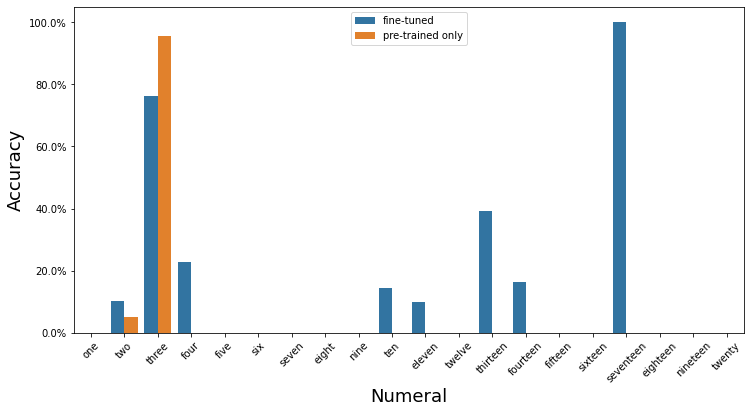

In [7]:
figsize = (12,6)
xlabel = "Numeral"
ylabel = "Accuracy"
path = "img/MI_counting_acc.png"

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="numeral", y="accuracy", hue="model type", data=result, ax=ax)
ax.set_xlabel(xlabel, fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=45)
ax.legend(loc="best")
plt.savefig(path, bbox_inches='tight', pad_inches=0.5)

In [9]:
result

,numeral,accuracy,model type
0,one,0.000000,fine-tuned
1,two,0.103448,fine-tuned
2,three,0.760870,fine-tuned
3,four,0.228070,fine-tuned
4,five,0.000000,fine-tuned
5,six,0.000000,fine-tuned
6,seven,0.000000,fine-tuned
7,eight,0.000000,fine-tuned
8,nine,0.000000,fine-tuned
9,ten,0.142857,fine-tuned


# Count results

In [8]:
# numerals = list(num2word.values())
# numerals = [n for n in numerals if n in set(df_count.label)]
# print_score(df_count, numerals)